___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [3]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
# Bank of America
BAC = yf.download("BAC",start,end)

# CitiGroup
C = yf.download("C",start,end)

# Goldman Sachs
GS = yf.download("GS",start,end)

# JPMorgan Chase
JPM = yf.download("JPM",start,end)

# Morgan Stanley
MS = yf.download("MS",start,end)

# Wells Fargo
WFC = yf.download("WFC",start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
# Old solution with datareader
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1)
bank_stocks = bank_stocks.swaplevel(0, 1, axis=1)

** Set the column name levels (this is filled out for you):**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.660282  30.725405  30.054631  30.556082  16296700  317.449646   
2006-01-04   30.334669  30.764486  30.250007  30.608188  17757900  311.588806   
2006-01-05   30.373741  30.497478  30.165345  30.334668  14970700  313.134613   
2006-01-06   30.328156  30.549577  30.184882  30.477940  12599800  313.134613   
2006-01-09   30.347683  30.588643  30.191387  30.425833  15619400  311.653259   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   318.029282  309.849926  315.581920  1537600  ...  31.522430   
2006-01-04   316.225936  311.395601  314.680232  1870960  ...  31.544075   
2006-01-05   314.165069  311.717707  311.975321  1143160  ...  31.630569   
2006-01-06   314.937931  310.429617  314.809114  1370210  ...  31.663010   
2006-01-09   313.907416  311.073623  313.005757  1680740  ...  31.998184   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   31.619739  30.673687  30.906144  5377000  18.469475  18.512899   
2006-01-04   32.046834  31.544075  31.733287  7977800  18.255247  18.423151   
2006-01-05   31.673819  31.365676  31.652194  5778000  18.234978  18.269716   
2006-01-06   31.814377  31.381897  31.771130  6889800  18.342094  18.397097   
2006-01-09   32.052246  31.690042  31.695449  4144500  18.339205  18.426053   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.061294  18.295781  11016400  
2006-01-04   18.159715  18.411571  10870000  
2006-01-05   18.127866  18.237872  10158000  
2006-01-06   18.171295  18.284196   8403800  
2006-01-09   18.269728  18.339205   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.xs(key='Close',axis=1,level=1).apply(max)

Bank Ticker
BAC     37.078720
C      378.467712
GS     183.258835
JPM     52.850239
MS      49.414913
WFC     43.540501
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000687,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

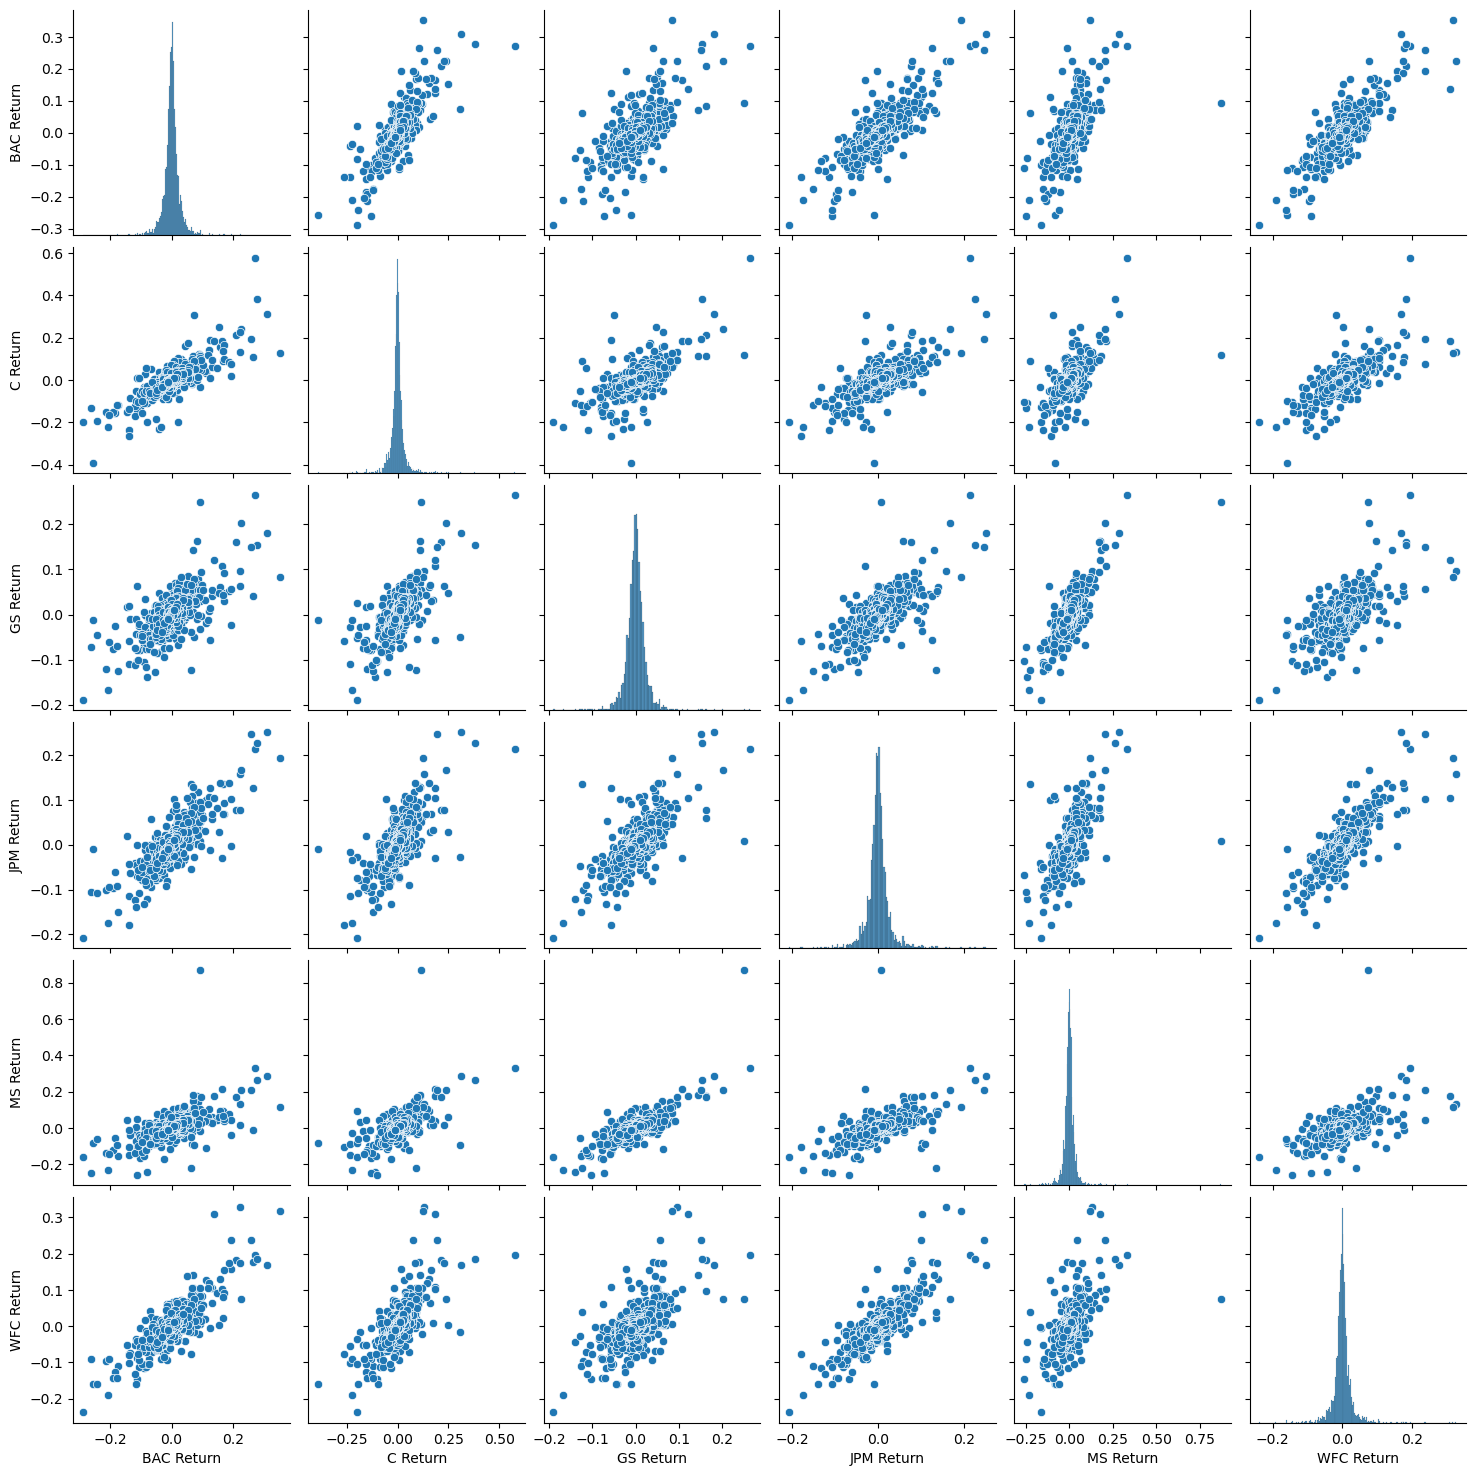

In [13]:
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.dropna().idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [17]:
returns.std()

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [36]:
returns.loc[datetime.datetime(2015,1,1) : datetime.datetime(2015,12,31)].std()

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/tmp/ipykernel_5359/4145036504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['MS Return'][datetime.datetime(2015,1,1) : datetime.datetime(2015,12,31)],bins=100,color='green')


<AxesSubplot: xlabel='MS Return', ylabel='Density'>

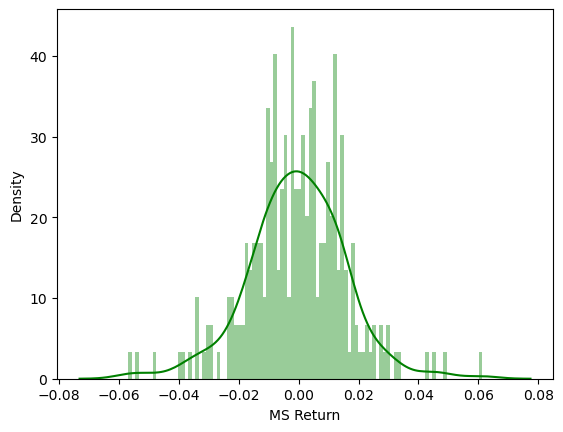

In [50]:
sns.distplot(returns['MS Return'][datetime.datetime(2015,1,1) : datetime.datetime(2015,12,31)],bins=100,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/tmp/ipykernel_5359/698307972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['C Return'][datetime.datetime(2008,1,1):datetime.datetime(2008,12,31)],bins=100,color='red')


<AxesSubplot: xlabel='C Return', ylabel='Density'>

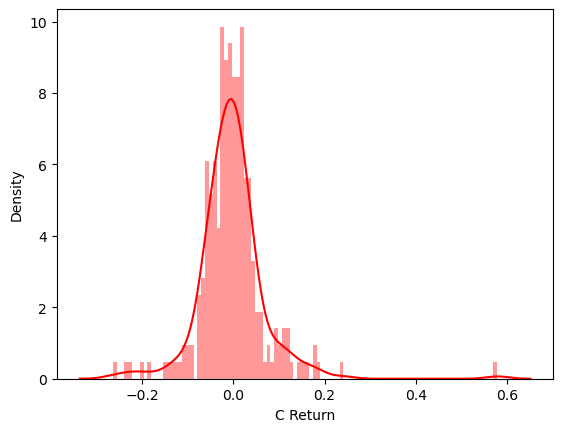

In [55]:
sns.distplot(returns['C Return'][datetime.datetime(2008,1,1):datetime.datetime(2008,12,31)],bins=100,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

# New solution
import plotly.express as px

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

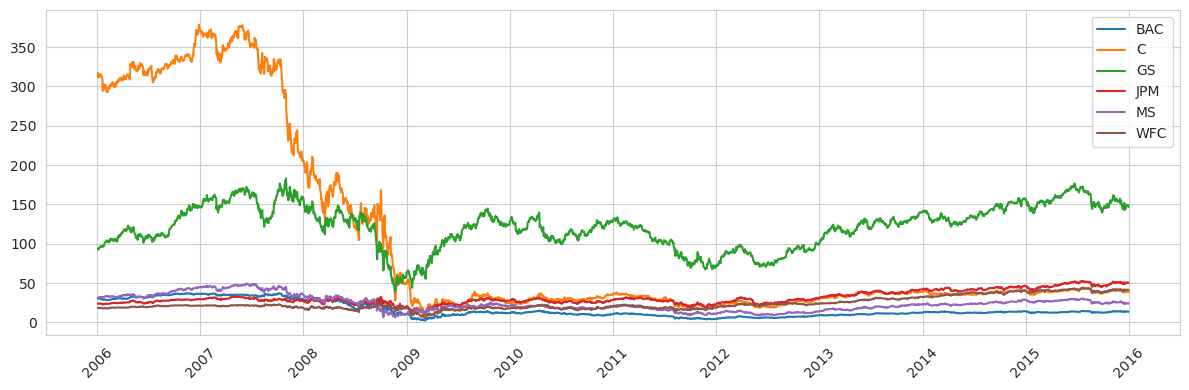

In [71]:
plt.figure(figsize=(12,4))
for tick in tickers:
    plt.plot(bank_stocks[tick]['Close'], label=tick)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

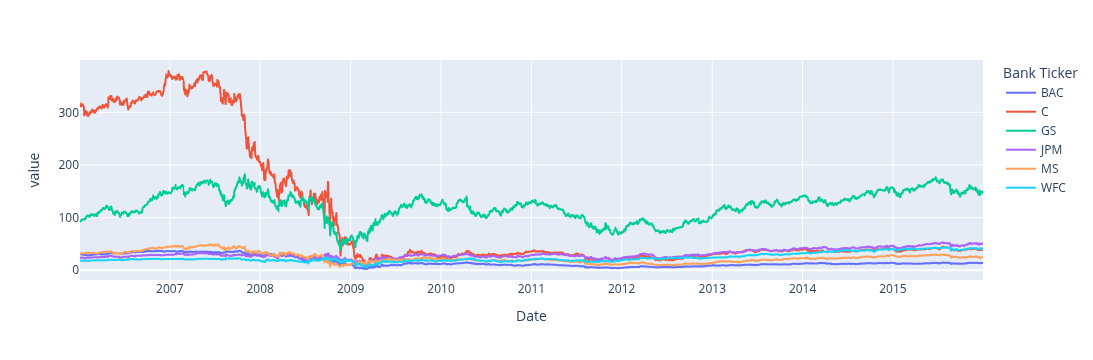

In [88]:
#bank_stocks.xs(key='Close',level=1,axis=1).plot(figsize=(12,4))
#plt.legend(loc='best')

px.line(bank_stocks.xs(key='Close', level=1, axis=1))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

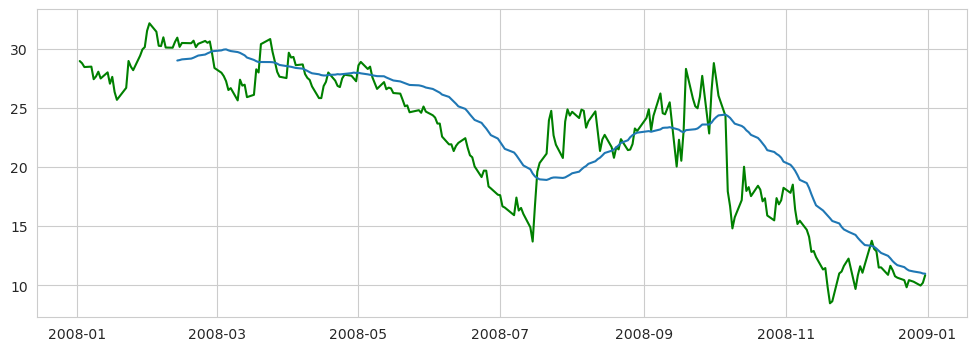

In [93]:
plt.figure(figsize=(12,4))
plt.plot(bank_stocks['BAC']['Close'][datetime.datetime(2008,1,1):datetime.datetime(2009,1,1)],label='BAC CLOSE',color='green')
plt.plot(bank_stocks['BAC']['Close'][datetime.datetime(2008,1,1):datetime.datetime(2009,1,1)].rolling(window=30).mean(),label='30 Day Avg')

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

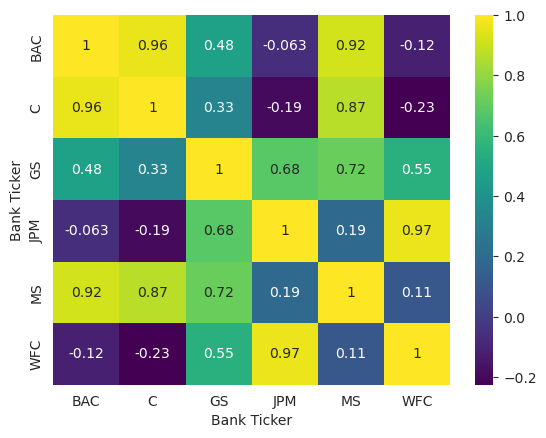

In [103]:
sns.heatmap(bank_stocks.xs(key='Close',level=1,axis=1).corr(),annot=True,cmap='viridis')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

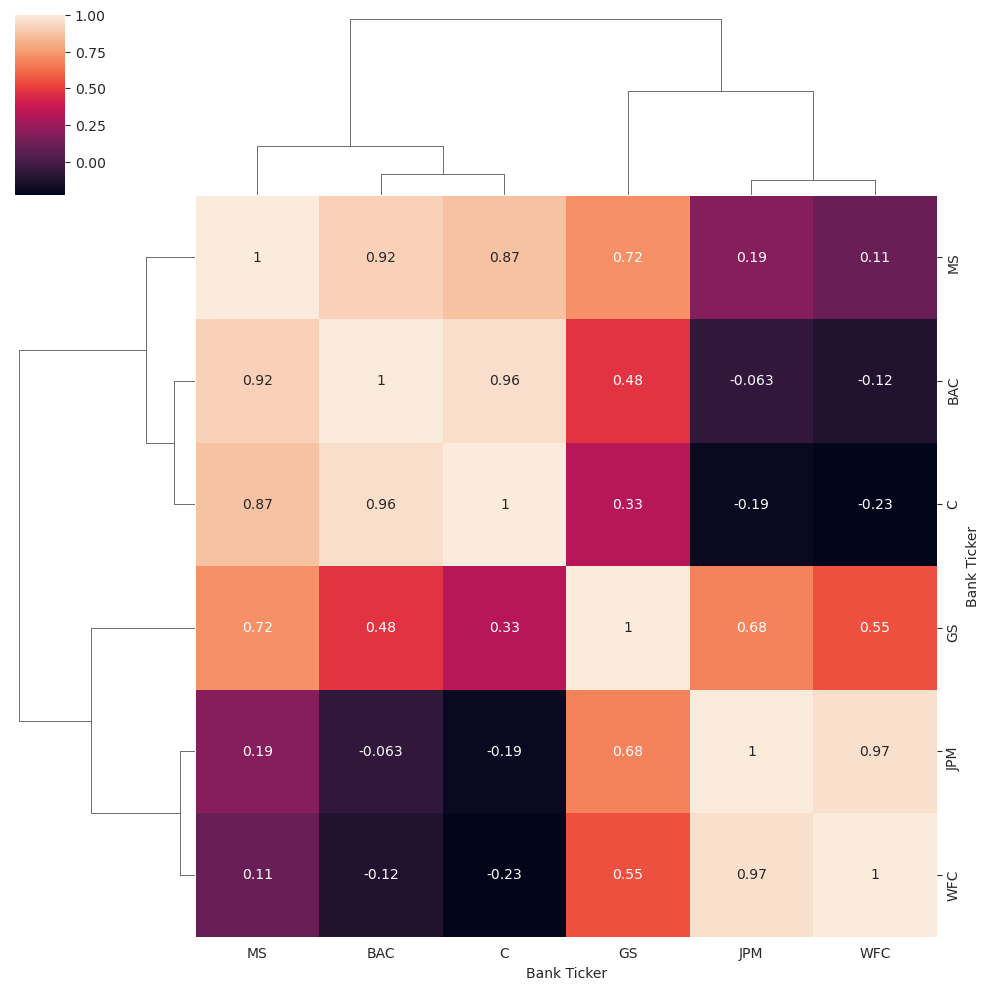

In [105]:
sns.clustermap(bank_stocks.xs(key='Close',level=1,axis=1).corr(),annot=True)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.